# Import necessary libraries

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
import random
import matplotlib.pyplot as plt

# Load the Iris dataset

In [21]:
iris = load_iris()
X = iris.data

# Run K-Medoids on the Iris dataset with k=3

In [19]:
k = 3
medoids, clusters, score = k_medoids(X, k)

# K-Medoids Algorithm

In [18]:
def k_medoids(X, k, max_iter=300):
    m, n = X.shape

    # Initialize medoids randomly
    medoids_idx = random.sample(range(m), k)
    medoids = X[medoids_idx]

    # To store the best medoids and clusters
    best_medoids = medoids
    best_clusters = None
    best_score = -1

    for iteration in range(max_iter):
        # Compute the pairwise distances between each point and the medoids
        distances = pairwise_distances(X, medoids)

        # Assign each point to the closest medoid
        clusters = np.argmin(distances, axis=1)

        # Recompute the medoids
        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_points = X[clusters == i]
            if len(cluster_points) > 0:
                # Choose the point in the cluster that minimizes the distance to all other points
                intra_distances = pairwise_distances(cluster_points, cluster_points)
                new_medoid_idx = np.argmin(np.sum(intra_distances, axis=1))
                new_medoids[i] = cluster_points[new_medoid_idx]

        # Check for convergence (if medoids don't change)
        if np.all(new_medoids == medoids):
            break

        # Update medoids for the next iteration
        medoids = new_medoids

        # Evaluate the clustering quality using silhouette score
        silhouette_avg = silhouette_score(X, clusters)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_medoids = medoids
            best_clusters = clusters

    return best_medoids, best_clusters, best_score

# Plotting the clusters

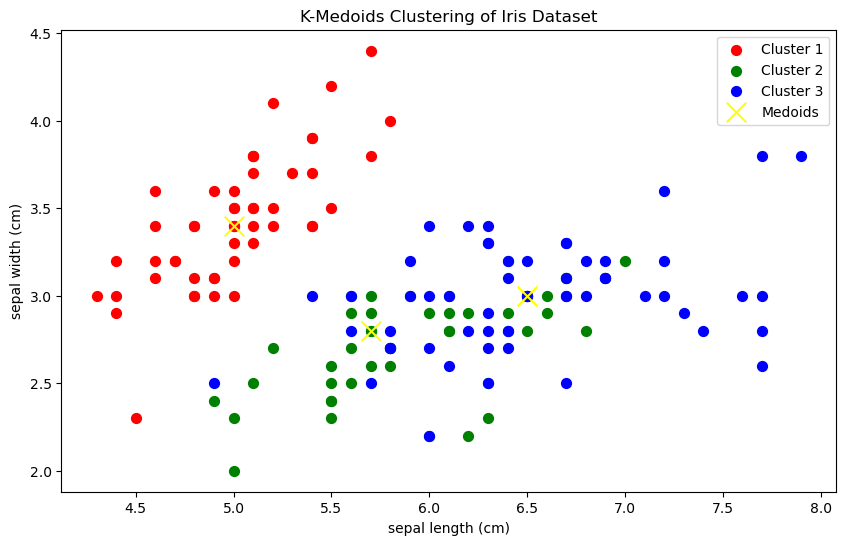

In [20]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], 
                cluster_points[:, 1], 
                c=colors[i],
                label=f'Cluster {i+1}', s=50)

# Plotting the medoids
plt.scatter(medoids[:, 0],
            medoids[:, 1], c='yellow', 
            marker='x', 
            s=200, 
            label='Medoids')

plt.title('K-Medoids Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

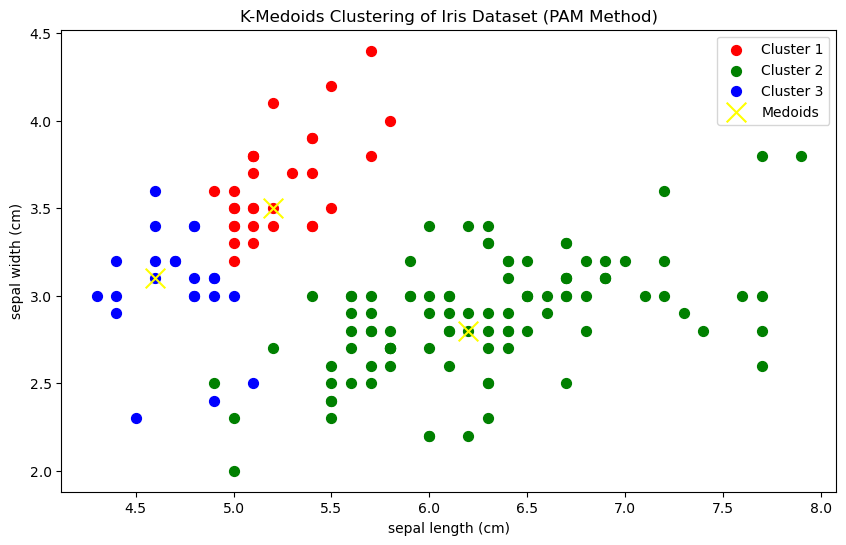

In [28]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import random
from sklearn.metrics import pairwise_distances

# Load the Iris dataset
iris = load_iris()
X = iris.data

# K-Medoids using Partitioning Around Medoids (PAM) approach
def pam_k_medoids(X, k, max_iter=300):
    m, n = X.shape

    # Step 1: Randomly initialize medoids
    medoids_idx = random.sample(range(m), k)
    medoids = X[medoids_idx]

    for iteration in range(max_iter):
        # Step 2: Assign each point to the nearest medoid
        distances = pairwise_distances(X, medoids)
        clusters = np.argmin(distances, axis=1)

        # Step 3: For each cluster, find the new medoid by minimizing the sum of distances
        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_points = X[clusters == i]
            if len(cluster_points) > 0:
                intra_distances = pairwise_distances(cluster_points, cluster_points)
                total_distances = np.sum(intra_distances, axis=1)
                new_medoid_idx = np.argmin(total_distances)
                new_medoids[i] = cluster_points[new_medoid_idx]

        # Step 4: Check for convergence (if medoids don't change)
        if np.all(new_medoids == medoids):
            break

        medoids = new_medoids

    return medoids, clusters

# Run K-Medoids on the Iris dataset with k=3
k = 3
medoids, clusters = pam_k_medoids(X, k)

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}', s=50)

# Plot the medoids
plt.scatter(medoids[:, 0], medoids[:, 1], c='yellow', marker='x', s=200, label='Medoids')

plt.title('K-Medoids Clustering of Iris Dataset (PAM Method)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()
